In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
# 각 이미지는 하나의 레이블에 매핑되어 있다.
# 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

#rank가 3

(60000, 28, 28)

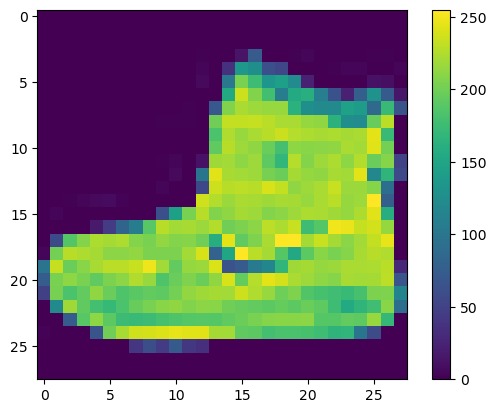

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 원래는 흑백인데 컬러바로 색깔 표현
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [7]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해본다. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비하기

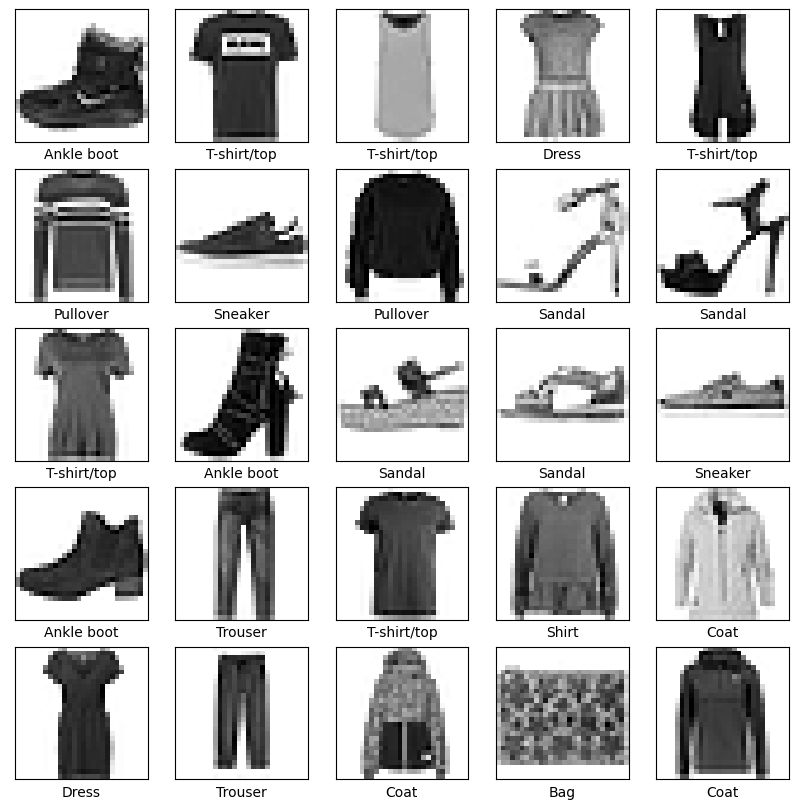

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-09-19 18:36:27.847371: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-09-19 18:36:28.080872: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe65c74cfc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-09-19 18:36:28.080895: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4997 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3746 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3369 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3114 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2955 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2816 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2692 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2564 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2480 - accuracy: 0.9077
Epoch 10/10
6

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3714 - accuracy: 0.8827

Test accuracy: 0.8827


## 예측하기

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)


In [17]:
predictions[0]

# 9일 확률이 98퍼센트이다 == 이항 분류!!

array([3.1381027e-09, 6.0871712e-13, 4.8702438e-09, 7.7266139e-13,
       3.9520327e-13, 4.3426151e-04, 2.1296903e-07, 1.0868420e-03,
       3.2580199e-11, 9.9847871e-01], dtype=float32)

# argmax 함수 : 

# 이미지에서 KNN적용
-주어진 이미지 - 제일 비슷한 이미지 찾기(0~9)
- 10개의 이미지와의 거리 계산해서 제일 최소값을 가지는 이미지의 “인덱스” = 인덱스 중에서 몇 번째냐고?
- argmin cf. argmax

-MNIST기준으로 KNN => 90% 초반 정확도

In [18]:
np.argmax(predictions[0])



9

In [19]:
test_labels[0]


9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

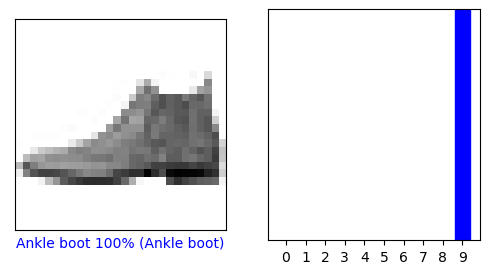

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

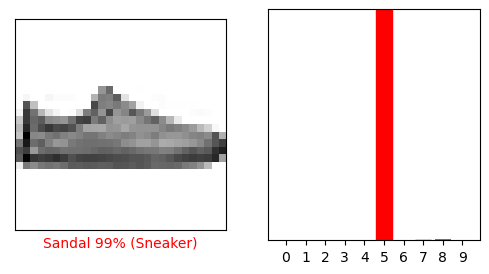

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# 샌달인지 운동화인지 못 맞추는거

In [24]:

# 몇 개의 이미지의 예측을 출력한 결과 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입
# 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점). 신뢰도 점수가 높을 때도 잘못 예측할 수 있다